## **Stock prediction with LSTM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from pandas_datareader.data import DataReader


sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



In [2]:
tech_list = ['AAPL','AMZN']

AAPL=pd.read_csv('/content/drive/MyDrive/data/AAPL_data.csv')
AMZN=pd.read_csv('/content/drive/MyDrive/data/AMZN_data.csv')

company_list = [AAPL, AMZN]
company_name = ["APPLE", "AMAZON"]

In [3]:
df = pd.concat(company_list, axis=0)
df.tail(10)

,date,open,high,low,close,volume,Name
1249,2018-01-25,1368.00,1378.34,1357.62,1377.95,4753012,AMZN
1250,2018-01-26,1392.01,1402.53,1380.91,1402.05,4857310,AMZN
1251,2018-01-29,1409.18,1431.39,1400.44,1417.68,5701898,AMZN
1252,2018-01-30,1403.17,1439.25,1392.00,1437.82,5871942,AMZN
1253,2018-01-31,1451.30,1472.58,1450.04,1450.89,6424693,AMZN
1254,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN
1258,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN


In [4]:
# Summary Stats
AAPL.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


In [5]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


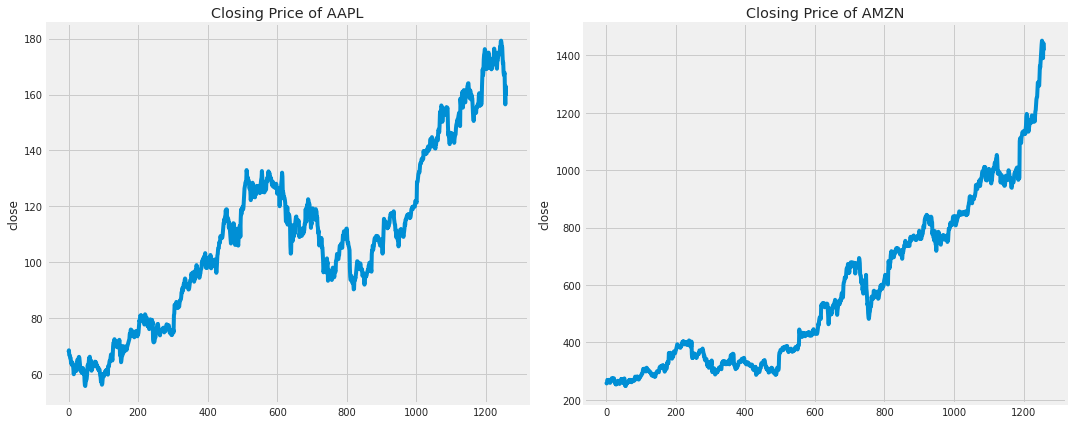

In [6]:
# see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 2, i)
    company['close'].plot()
    plt.ylabel('close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

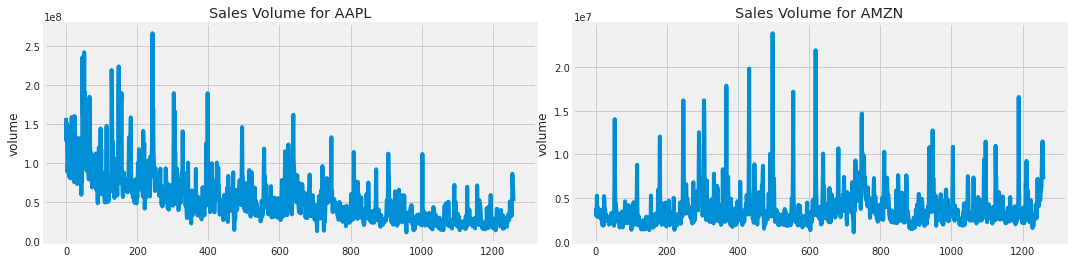

In [7]:
# Now let's plot the total volume 
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['volume'].plot()
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# **Moving average**

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()

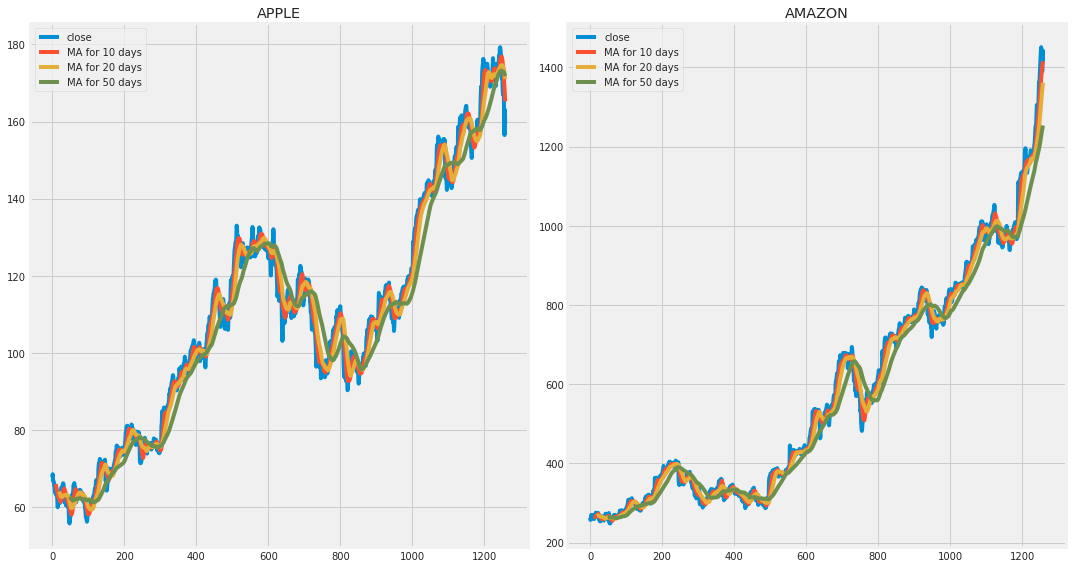

In [9]:
fig, axes = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('APPLE')

AMZN[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('AMAZON')

fig.tight_layout()

# **Daily return of the stock**




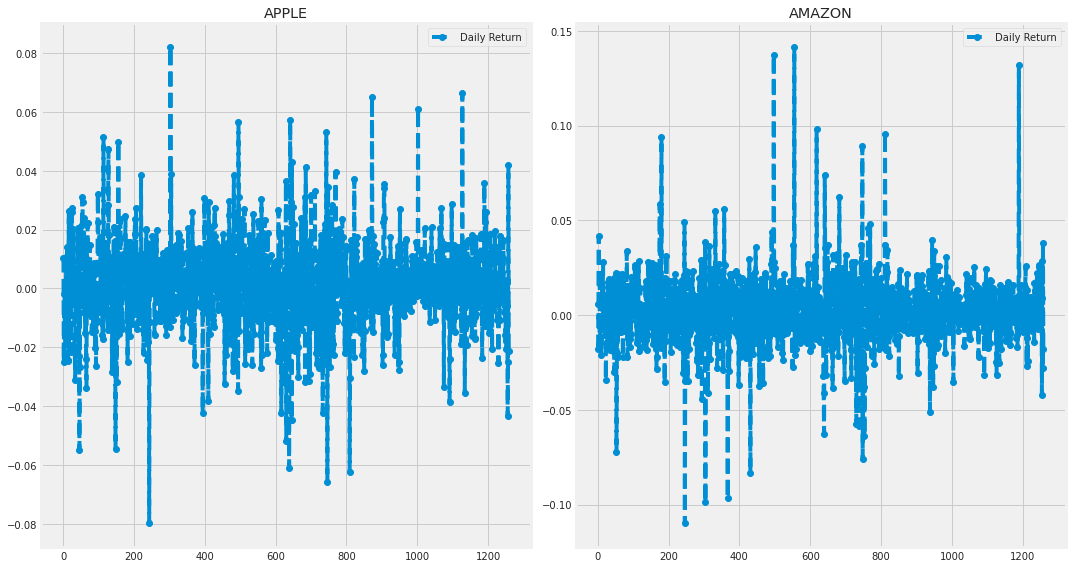

In [10]:
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

fig, axes = plt.subplots(ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('APPLE')

AMZN['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


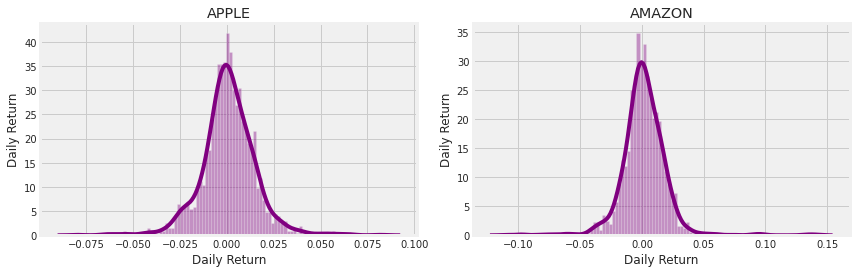

In [11]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# Finding correlation between different stocks closing prices

In [12]:
AAPL_close_price=AAPL.iloc[:,4]
AMZN_close_price=AMZN.iloc[:,4]
company_closeprice_list=[ AAPL_close_price, AMZN_close_price]
closing_df = pd.concat(company_closeprice_list, axis=1)

closing_df.columns = ['AAPL','AMZN']
closing_df.head() 

,AAPL,AMZN
0,67.8542,261.95
1,68.5614,257.21
2,66.8428,258.70
3,66.7156,269.47
4,66.6556,269.24


In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN
0,NaN,NaN
1,0.010422,-0.018095
2,-0.025067,0.005793
3,-0.001903,0.041631
4,-0.000899,-0.000854


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


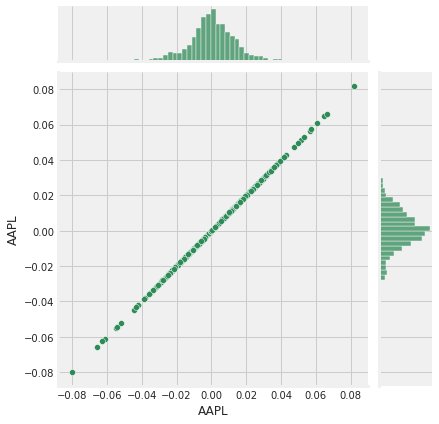

In [14]:
sns.jointplot('AAPL', 'AAPL', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


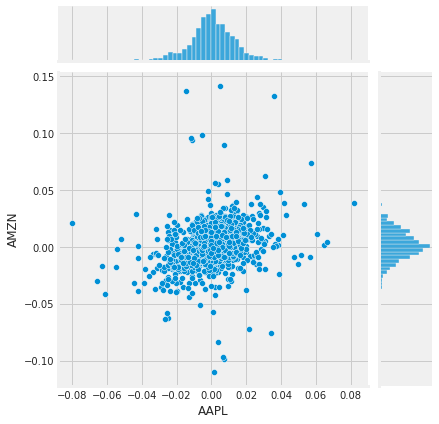

In [15]:
sns.jointplot('AAPL', 'AMZN', tech_rets, kind='scatter')

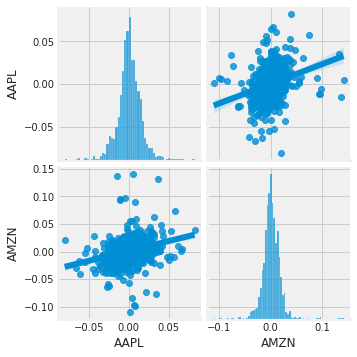

In [16]:
sns.pairplot(tech_rets, kind='reg')

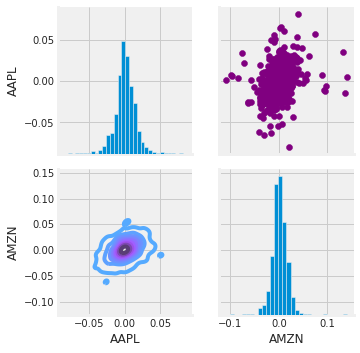

In [17]:
# Set up figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper can specify how the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# define the lower triangle in the figure, inclufing the plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

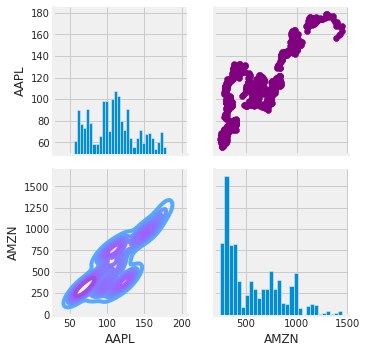

In [18]:
#similar to above
# Set up figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

#define the lower triangle in the figure, inclufing the plot type (kde)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

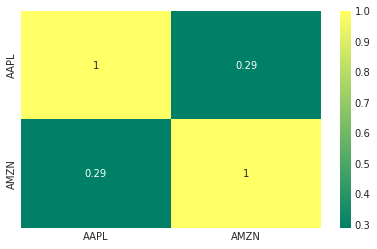

In [19]:
# use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

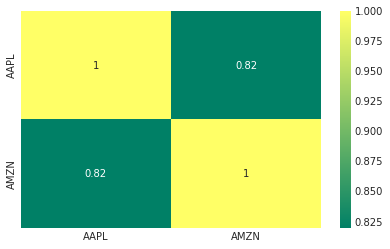

In [20]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

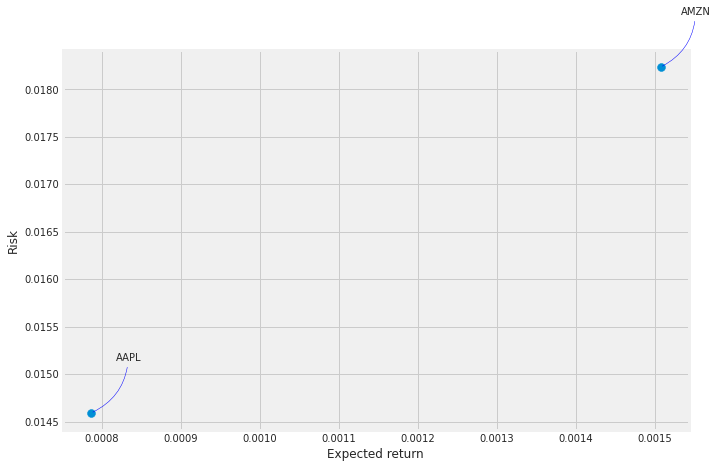

In [21]:
# defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [22]:
# Show teh data
AAPL

,date,open,high,low,close,volume,Name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN,0.010422
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN,-0.025067
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN,-0.001903
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN,-0.000899
...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,171.948,173.8700,172.8252,0.002090
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,170.152,173.2435,172.6356,-0.043390
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,168.101,172.3180,172.3026,-0.024984
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,166.700,171.7520,172.0640,0.041792


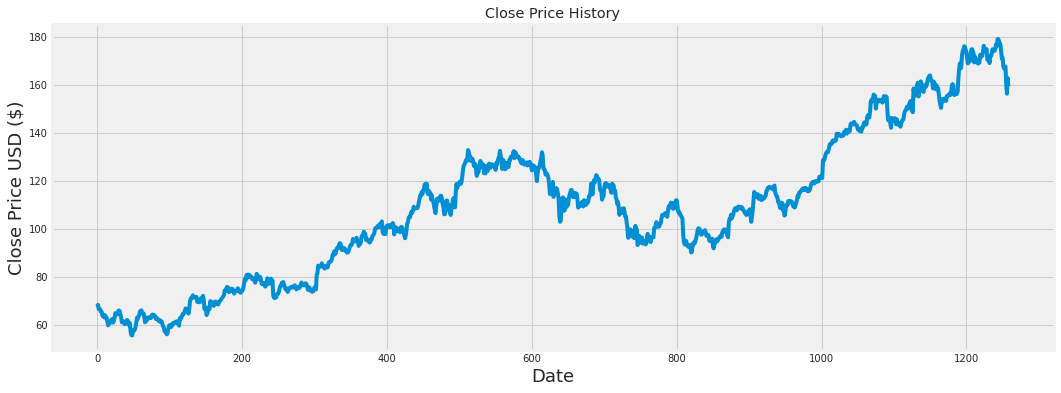

In [23]:
# plot
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2393

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00864762],
       [0.00915454],
       [0.00792266],
       ...,
       [0.95635439],
       [0.9942298 ],
       [0.97555014]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00864762, 0.00915454, 0.00792266, 0.00783148, 0.00778847,
       0.0071301 , 0.00711268, 0.00597197, 0.00568626, 0.00617268,
       0.00535245, 0.00598423, 0.00553365, 0.00520909, 0.00408989,
       0.00302287, 0.00415884, 0.00359752, 0.00410135, 0.00421783,
       0.00484761, 0.00388094, 0.00387277, 0.00429776, 0.00544047,
       0.00667543, 0.00654949, 0.0063027 , 0.00636922, 0.0073093 ,
       0.00748025, 0.00723002, 0.0063027 , 0.00533811, 0.00393011,
       0.00402043, 0.0042455 , 0.00380826, 0.00334542, 0.00365364,
       0.00373249, 0.0046244 , 0.00448513, 0.00402122, 0.00300237,
       0.00365673, 0.00125647, 0.00015569, 0.        , 0.00083356,
       0.00159745, 0.00152907, 0.00182783, 0.00273156, 0.00405405,
       0.00535037, 0.00499305, 0.00563099, 0.00608766, 0.00718637])]
[0.0069762736021594315]

[array([0.00864762, 0.00915454, 0.00792266, 0.00783148, 0.00778847,
       0.0071301 , 0.00711268, 0.00597197, 0.00568626, 0.00617268,
       0.00535245, 0.00598423, 0.

# **Build the LSTM model**

In [27]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile 
model.compile(optimizer='adam', loss='mean_squared_error')

# Train 
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 [==============================] - 145s 60ms/step - loss: 6.6585e-04


In [28]:
# Create the testing data set
# Create a new array containing scaled values from 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 51ms/step


35.477919682481385

<ipython-input-29-80d99347fe07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


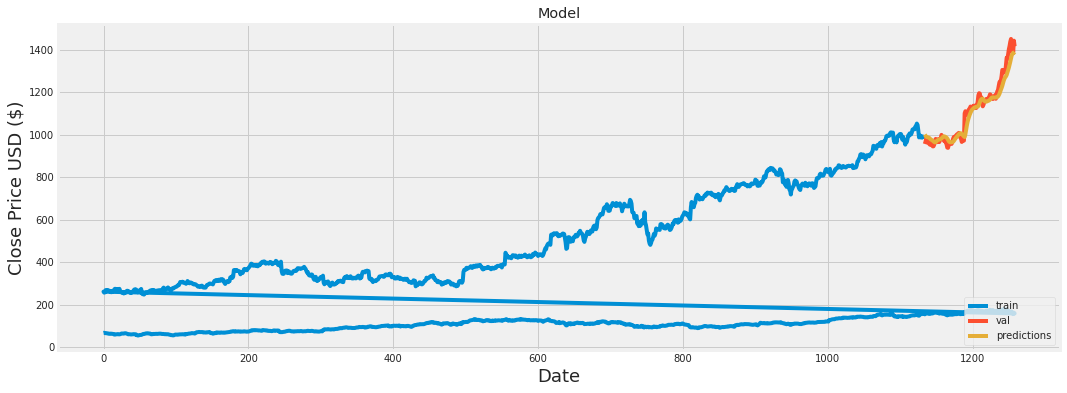

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

# Visualize the final data ploted
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['train', 'val', 'predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,close,predictions
1134,956.92,1001.298096
1135,967.99,995.600464
1136,983.30,990.783813
1137,982.74,988.776550
1138,978.18,988.212036
...,...,...
1254,1390.00,1374.171143
1255,1429.95,1379.849976
1256,1390.00,1385.771118
1257,1442.84,1385.888428


# **Predictions plot with a closer look**

<ipython-input-32-4921595abc1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


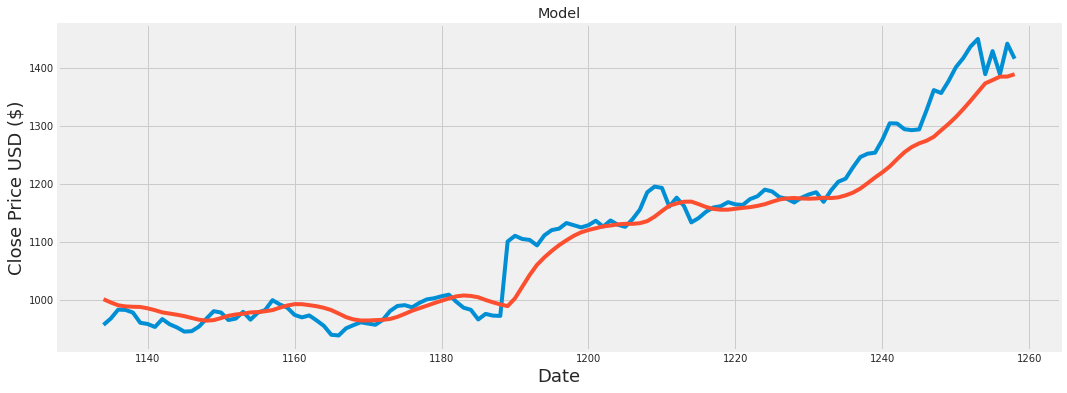

In [32]:
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['close', 'predictions']])
plt.show()